In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import random

In [3]:
def graficas(Im1, Im2, k):
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6), sharex=True, sharey=True)
    ax1 = axes.ravel()

    ax1[0].imshow(Im1, cmap=plt.cm.brg)
    #ax1[0].set_title('Original')
    ax1[1].imshow(Im2, cmap=plt.cm.brg)
    #ax1[1].set_title('Img K-means  [k = '+str(k)+']')
    
    for a in ax1:
        a.set_axis_off()

    fig.tight_layout()
    plt.show()

## Se lee la imagen original

In [2]:
im_bgr = cv2.imread('Jit1.JPG')


im_rgb = im_bgr[:, :, [2, 1, 0]]    

scale_percent = 10 # percent of original size
width = int(im_rgb.shape[1] * scale_percent / 100)
height = int(im_rgb.shape[0] * scale_percent / 100)
dim = (width, height)  

resized = cv2.resize(im_rgb, dim, interpolation = cv2.INTER_AREA)


## Se establece el número de clusters

In [4]:
k = 4

In [5]:
vectorised = resized.reshape((-1,3))


img_df = pd.DataFrame(vectorised)
img_df.rename(columns={0:'R', 1:'G', 2: 'B'}, inplace =True)

## Se establecen los centroides iniciales de los k-clusters

In [31]:
random.seed(3)

centroids = np.zeros((k,3))

for i in range(k):

    pixel = img_df.iloc[random.randint(1,len(img_df.axes[0]))]
    r=pixel['R']
    g=pixel['G']
    b=pixel['B']

    # x = random.randint(0,len(positions_x))
    # y = random.randint(0,rows)

    centroids[i]=[r,g,b]

print(centroids)

centroids = pd.DataFrame({"R":centroids[:,0],"G":centroids[:,1],"B":centroids[:,1]})

centroids


# centroids = get_random_centroids(img_df, k)
# centroids

[[173.  40.  31.]
 [140. 138. 134.]
 [126.  25.  19.]
 [176. 177. 178.]]


,R,G,B
0,173.0,40.0,40.0
1,140.0,138.0,138.0
2,126.0,25.0,25.0
3,176.0,177.0,177.0


## K-means

In [32]:
diff = 1
j=0

while(abs(diff) > 0.5):         
    XD=img_df
    i=1
    
   
    for index1,row_c in centroids.iterrows():
        ED=[]
        
        for index2,row_d in XD.iterrows():
           
            d1=(row_c["R"]-row_d["R"])**2
            d2=(row_c["G"]-row_d["G"])**2
            d3=(row_c["B"]-row_d["B"])**2
            d=np.sqrt(d1+d2+d3)
          
            ED.append(d)
   
        img_df[i]=ED
        i=i+1
     

    C=[]
   
    for index,row in img_df.iterrows():
     
        min_dist=row[1]
        pos=1
        
     
        for i in range(k):
            
            if row[i+1] < min_dist:
               
                min_dist = row[i+1]
                pos=i+1
                
        C.append(pos)
        

    img_df["Cluster"]=C

    centroids_new = img_df.groupby(["Cluster"]).mean()[["R","G","B"]]
    
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (centroids_new['R'] - centroids['R']).sum() + (centroids_new['G'] - centroids['G']).sum() + (centroids_new['B'] - centroids['B']).sum()
        # print("Diferencia entre centroides (actual - anterior):", diff.sum())
    
    centroids = img_df.groupby(["Cluster"]).mean()[["R","G","B"]]

Diferencia entre centroides (actual - anterior): -35.019950819286365
Diferencia entre centroides (actual - anterior): -9.94517162538244
Diferencia entre centroides (actual - anterior): 4.63304268670781
Diferencia entre centroides (actual - anterior): 5.035587590511948
Diferencia entre centroides (actual - anterior): 3.680212618582015
Diferencia entre centroides (actual - anterior): 2.671883583852356
Diferencia entre centroides (actual - anterior): 2.2048990528361436
Diferencia entre centroides (actual - anterior): 2.041246618356915
Diferencia entre centroides (actual - anterior): 1.7736833279399704
Diferencia entre centroides (actual - anterior): 1.1125154599115028
Diferencia entre centroides (actual - anterior): 1.3199496462238933
Diferencia entre centroides (actual - anterior): 0.8887505395828228
Diferencia entre centroides (actual - anterior): 1.1007169237510652
Diferencia entre centroides (actual - anterior): 0.7205967880309956
Diferencia entre centroides (actual - anterior): 0.606

In [33]:
centroides = centroids.to_numpy() 

In [34]:
labels = img_df["Cluster"].to_numpy()

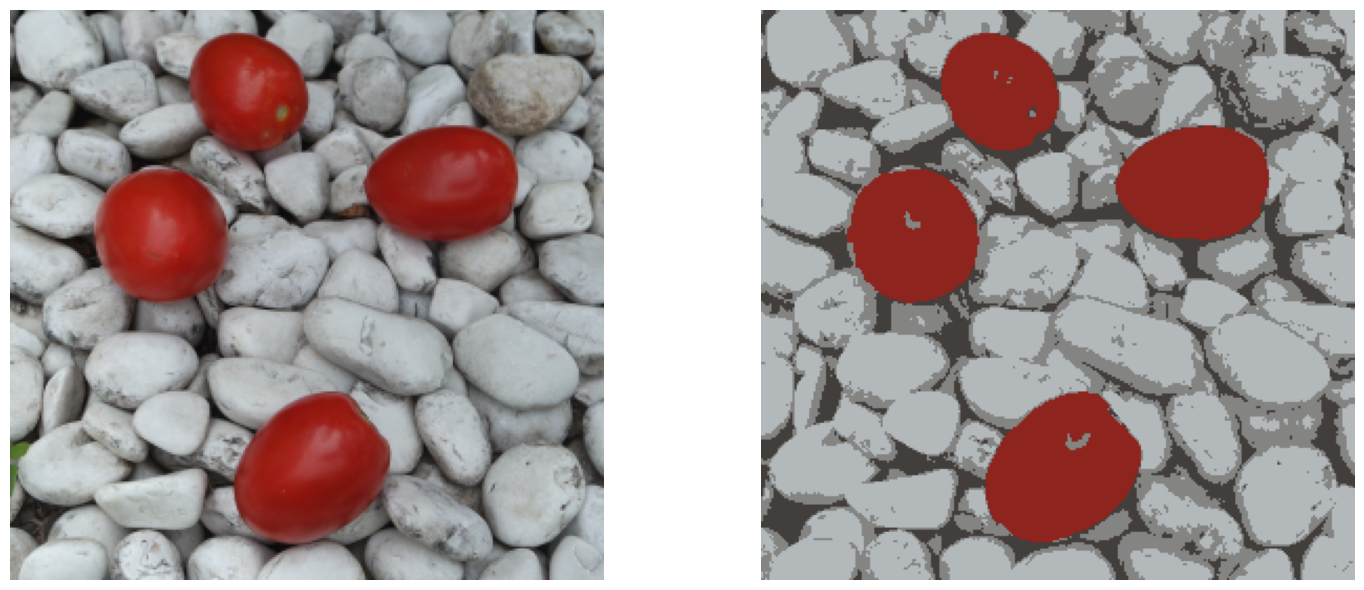

In [35]:

segmented_image = centroides[labels-1]
segmented_image = segmented_image.reshape(resized.shape)

ImSegmented = segmented_image.astype(np.uint8)
ImOrig = resized.astype(np.uint8)
graficas(ImOrig, ImSegmented, k)


## Segmentan los4 grupos detectados en la imagen

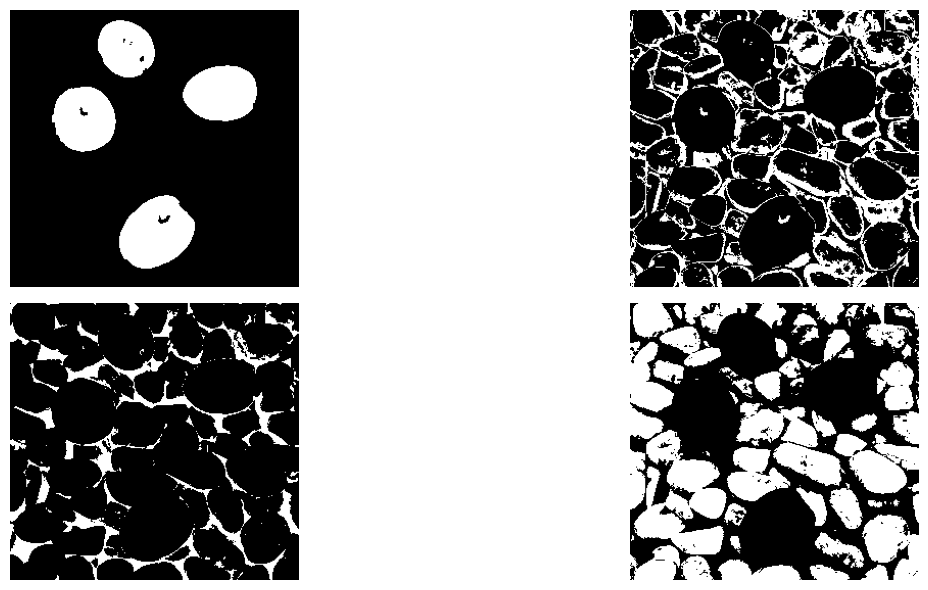

In [36]:
rows = ImSegmented.shape[0]
cols = ImSegmented.shape[1]

k1 = np.zeros((rows,cols),np.uint8)
k2 = np.zeros((rows,cols),np.uint8)
k3 = np.zeros((rows,cols),np.uint8)
k4 = np.zeros((rows,cols),np.uint8)
k5 = np.zeros((rows,cols),np.uint8)

#
for i in range(rows):
    for j in range(cols):
        #print(i,j)
        
        blue = ImSegmented[i,j,2]
        green = ImSegmented[i,j,1]
        red = ImSegmented[i,j,0]

        #Si se pega al grupo 1
        if [red,green,blue] == [math.floor(centroides[0,0]),math.floor(centroides[0,1]),math.floor(centroides[0,2])]:
            k1[i,j] = 255

        elif [red,green,blue] == [math.floor(centroides[1,0]),math.floor(centroides[1,1]),math.floor(centroides[1,2])]:
            k2[i,j] = 255

        elif [red,green,blue] == [math.floor(centroides[2,0]),math.floor(centroides[2,1]),math.floor(centroides[2,2])]:
            k3[i,j] = 255

        elif [red,green,blue] == [math.floor(centroides[3,0]),math.floor(centroides[3,1]),math.floor(centroides[3,2])]:
            k4[i,j] = 255


fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 6), sharex=True, sharey=True)
ax1 = axes.ravel()

ax1[0].imshow(k1, cmap=plt.cm.gray)
ax1[1].imshow(k2, cmap=plt.cm.gray)
ax1[2].imshow(k3, cmap=plt.cm.gray)
ax1[3].imshow(k4, cmap=plt.cm.gray)

for a in ax1:
    a.set_axis_off()

fig.tight_layout()
plt.show()

## Procesar imagen de los tomates

In [38]:
imagen = k1

In [39]:
positions_x = []
positions_y = []

rows = imagen.shape[0]
cols = imagen.shape[1]

#Se encuentran los pixeles blancos
for i in range(rows): #filas
    for j in range(cols): #columnas

        value = imagen[i,j]

        if value == 255:

            positions_x.append(j)
            positions_y.append(i)

In [40]:
pos_df = pd.DataFrame({"x":positions_x,"y":positions_y})

## Segmentación de 4 tomates

In [41]:
k=4

In [42]:
random.seed(15)

white_centroids = np.zeros((k,2))

for i in range(k):

    pixel = pos_df.iloc[random.randint(1,len(pos_df.axes[0]))]
    x=pixel['y']
    y=pixel['x']

    # x = random.randint(0,len(positions_x))
    # y = random.randint(0,rows)

    white_centroids[i]=[x,y]

print(white_centroids)

white_centroids = pd.DataFrame({"x":white_centroids[:,0],"y":white_centroids[:,1]})

white_centroids

# white_centroids =get_random_centroids(pos_df, k)
# white_centroids

[[ 75. 205.]
 [ 18. 110.]
 [137.  62.]
 [244. 129.]]


,x,y
0,75.0,205.0
1,18.0,110.0
2,137.0,62.0
3,244.0,129.0


In [43]:
diff = 1
j=0

while(abs(diff) > 0.5):          
    XD=pos_df
    i=1
    
 
    for index1,row_c in white_centroids.iterrows():
        ED=[]
       
        for index2,row_d in XD.iterrows():
           
            d1=(row_c["x"]-row_d["x"])**2
            d2=(row_c["y"]-row_d["y"])**2
            d=np.sqrt(d1+d2)
        
            ED.append(d)
            
        
        pos_df[i]=ED
        i=i+1
      

    C=[]
   
    
    for index,row in pos_df.iterrows():
        
        min_dist=row[1]
        pos=1
        
      
        for i in range(k):
            
            if row[i+1] < min_dist:
               
                min_dist = row[i+1]
                pos=i+1
                
        C.append(pos)
        

    pos_df["Cluster"]=C

    centroids_new = pos_df.groupby(["Cluster"]).mean()[["x","y"]]
    
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (centroids_new["x"] - white_centroids["x"]).sum() + (centroids_new["y"] - white_centroids["y"]).sum()
    #     print("Diferencia entre centroides (actual - anterior):", diff.sum())

    #     print(centroids_new)
    #     print(white_centroids)

    # print(j)

    white_centroids = pos_df.groupby(["Cluster"]).mean()[["x","y"]]

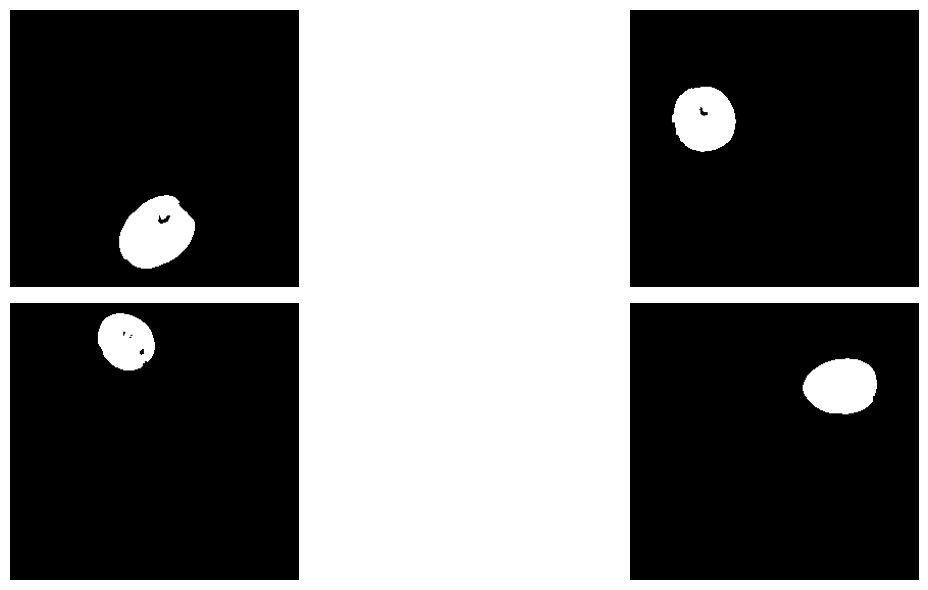

In [45]:
rows = imagen.shape[0]
cols = imagen.shape[1]

o1 = np.zeros((rows,cols),np.uint8)
o2 = np.zeros((rows,cols),np.uint8)
o3 = np.zeros((rows,cols),np.uint8)
o4 = np.zeros((rows,cols),np.uint8)

for index, row in pos_df.iterrows():

    cluster = row["Cluster"]

    x = row["x"]
    y = row['y']
    if cluster == 1:
      o1[int(y),int(x)] = 255
    elif cluster == 2:
      o2[int(y),int(x)] = 255
    elif cluster == 3:
      o3[int(y),int(x)] = 255
    elif cluster == 4:
      o4[int(y),int(x)] = 255

    
  
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 6), sharex=True, sharey=True)
ax1 = axes.ravel()

ax1[0].imshow(o1, cmap=plt.cm.gray)
ax1[1].imshow(o2, cmap=plt.cm.gray)
ax1[2].imshow(o3, cmap=plt.cm.gray)
ax1[3].imshow(o4, cmap=plt.cm.gray)
for a in ax1:
    a.set_axis_off()

fig.tight_layout()
plt.show()

# Tomate 2

In [50]:
#La imagen cuatro corresponde al tomate 4
t2 = o4

t2_x = []
t2_y = []

####
rows_t2 = t2.shape[0]
cols_t2 = t2.shape[1]

for i in range(rows_t2):
  for j in range(cols_t2):

    value = t2[i,j]

    if value == 255:
      t2_x.append(j)
      t2_y.append(i)


pos_t2 = pd.DataFrame({"x":t2_x,"y":t2_y})

# print(pos_t2)

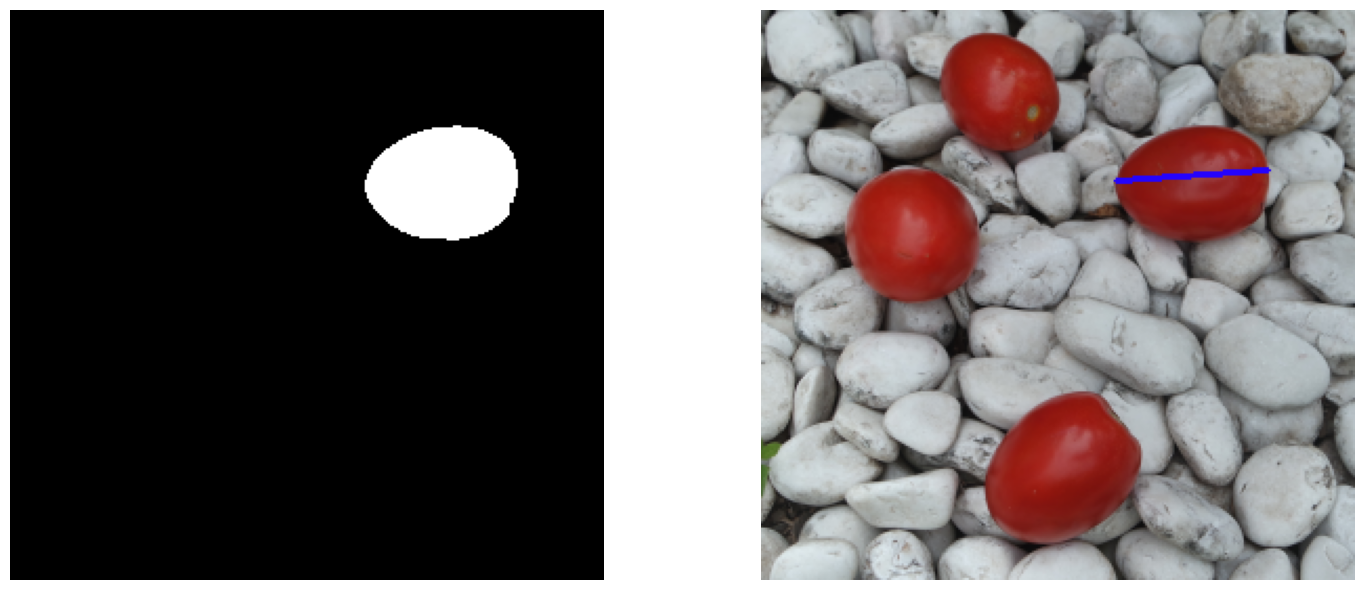

In [51]:
min_x = min(t2_x) #Encuentra el valor minimo de x
i_minx = t2_x.index(min_x)
min_y = t2_y[i_minx] 
#Encontrar max

max_x = max(t2_x) #Encuentra el valor minimo de x
i_maxx = t2_x.index(max_x)
max_y = t2_y[i_maxx]

p1_t2 = [min_x,min_y]
p2_t2 = [max_x,max_y]


copia3 = resized.copy()
cv2.line(copia3,(min_x,min_y),(max_x,max_y),(37, 3, 252),2)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6), sharex=True, sharey=True)
ax1 = axes.ravel()

ax1[0].imshow(t2, cmap=plt.cm.gray)
ax1[1].imshow(copia3, cmap=plt.cm.gray)
for a in ax1:
    a.set_axis_off()

fig.tight_layout()
plt.show()

## Tomate 4

In [52]:
t4 = o1

t4_x = []
t4_y = []

####
rows_t4 = t4.shape[0]
cols_t4 = t4.shape[1]

for i in range(rows_t4):
  for j in range(cols_t4):

    value = t4[i,j]

    if value == 255:
      t4_x.append(j)
      t4_y.append(i)


In [53]:
## Encontrar puntos mas pegados a la izquierda y hacia abajo
min_x2 = min(t4_x) #Encuentra el valor minimo de x
i_minx2 = t4_x.index(min_x2)
min_y2 = t4_y[i_minx2] 
#Encontrar max

max_y2 = max(t4_y) #Encuentra el valor mas bajo de y
i_maxy2 = t4_y.index(max_y2)
max_x2 = t4_y[i_maxy2]

p1_t4_x = min(min_x2,max_x2)
p1_t4_y = max(min_y2,max_y2)

p1_t4 = [p1_t4_x,p1_t4_y]


print(p1_t4)

## Encontrar puntos mas pegados a la derecha y arriba
x_1 = max(t4_x) #Encuentra el valor minimo de x
i_1 = t4_x.index(x_1)
y_1= t4_y[i_1] 
#Encontrar max

y_2 = min(t4_y) #Encuentra el valor mas arriba de y
i_2 = t4_y.index(y_2)
x_2 = t4_y[i_2]

p2_t4_x = max(x_1,x_2)
p2_t4_y = min(y_1,y_2)

p2_t4 = [p2_t4_x,p2_t4_y]


print(p2_t4)


# #Pintar las lineas
# copia2 = imageRGB
# cv2.line(copia2,(p1_t4[0],p1_t4[1]),(p2_t4[0],p2_t4[1]),(255,255,255),3)
 
# fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6), sharex=True, sharey=True)
# ax1 = axes.ravel()

# ax1[0].imshow(t4, cmap=plt.cm.gray)
# ax1[1].imshow(copia2, cmap=plt.cm.gray)
# for a in ax1:
#     a.set_axis_off()

# fig.tight_layout()
# plt.show()

[107, 253]
[182, 182]


In [54]:
m =(p1_t4[1]-p2_t4[1])/(p1_t4[0]-p2_t4[0])

# print(m)

X = [x for x in range(min(p1_t4[0],p2_t4[0]),max(p1_t4[0],p2_t4[0])+1)]

Y = map(lambda x: round((m*x -(p1_t4[0]*m) + p1_t4[1])),X)
Y = list(Y)

# print(X)
# print(Y)

# print(t4[360,172])


-0.9466666666666667


[115, 245]
[168, 195]


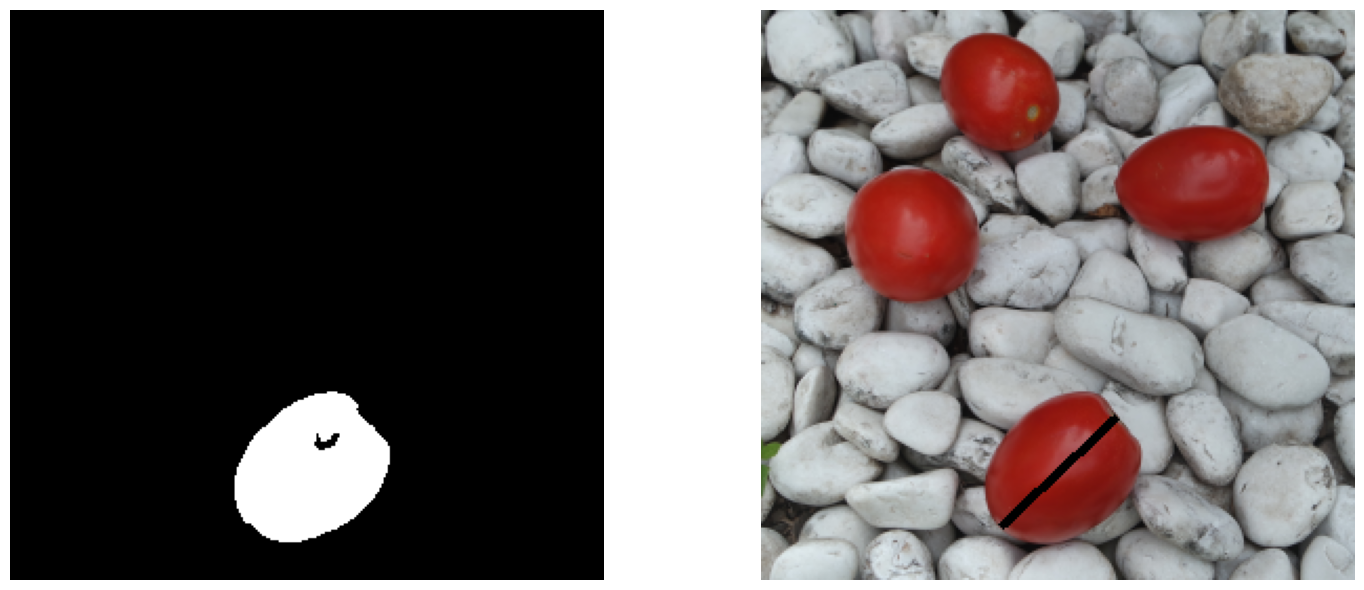

In [56]:
contador = 0

punto_inicial = []

punto_final = []

for i in range(len(X)):
    #Encontrar el primer cruce
    #print(i)
    x = X[i]
    y = Y[i]

    value = t4[y,x]


    #print(value)

    # if value==255:
    #     print(value)
        
    if contador==0 and value==255:
#     x = X[i]
#     y = Y[i]
        punto_inicial.append(x)
        punto_inicial.append(y)
        contador =1
    if contador==1 and value==0:
        punto_final.append(X[i-1])
        punto_final.append(Y[i-1])
        contador =1
        break
    #     value = t4[y,x]

    #     #Inicia la forma
    #     if value==255:
        
    #         punto_inicial.append(x)
    #         punto_inicial.append(y)
    #         contador ==1

    # #Encontrar el primer cruce
    # elif contador==1:

    #     x = X[i]
    #     y = Y[i]

    #     value = t4[y,x]

    #     #Inicia la forma
    #     if value==0:

    #         if contador==0:
    #             punto_final.append(X[i-1])
    #             punto_final.append(y[i-1])

    # print(contador)
#Pintar la linea
#print(contador)


print(punto_inicial)
print(punto_final)


copia4 = resized.copy()
cv2.line(copia4,(punto_inicial[0],punto_inicial[1]),(punto_final[0],punto_final[1]),(0,0,0),3)
 
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6), sharex=True, sharey=True)
ax1 = axes.ravel()

ax1[0].imshow(t4, cmap=plt.cm.gray)
ax1[1].imshow(copia4, cmap=plt.cm.gray)
for a in ax1:
    a.set_axis_off()

fig.tight_layout()
plt.show()

## Resultado final

### Datos tomate 2

In [57]:
print("Resultados de acuerdo a coordeanas (X,Y)")

print(f"Punto inicial:({min_x},{min_y})")
print(f"Punto final: ({max_x},{max_y})")

distancia = math.dist([min_x,min_y],[max_x,max_y])
print(f"Distancia: {distancia} pixeles")

Resultados de acuerdo a coordeanas (X,Y)
Punto inicial:(169,81)
Punto final: (241,76)
Distancia: 72.17340230306452 pixeles


### Datos tomate 4

In [58]:
print("Resultados de acuerdo a coordeanas (X,Y) ")
print(f"Punto inicial:({punto_inicial[0]},{punto_inicial[1]})")
print(f"Punto final: ({punto_final[0]},{punto_final[1]})")

distancia = math.dist([punto_inicial[0],punto_inicial[1]],[punto_final[0],punto_final[1]])
print(f"Distancia: {distancia} pixeles")

Resultados de acuerdo a coordeanas (X,Y) 
Punto inicial:(115,245)
Punto final: (168,195)
Distancia: 72.86288492778748 pixeles


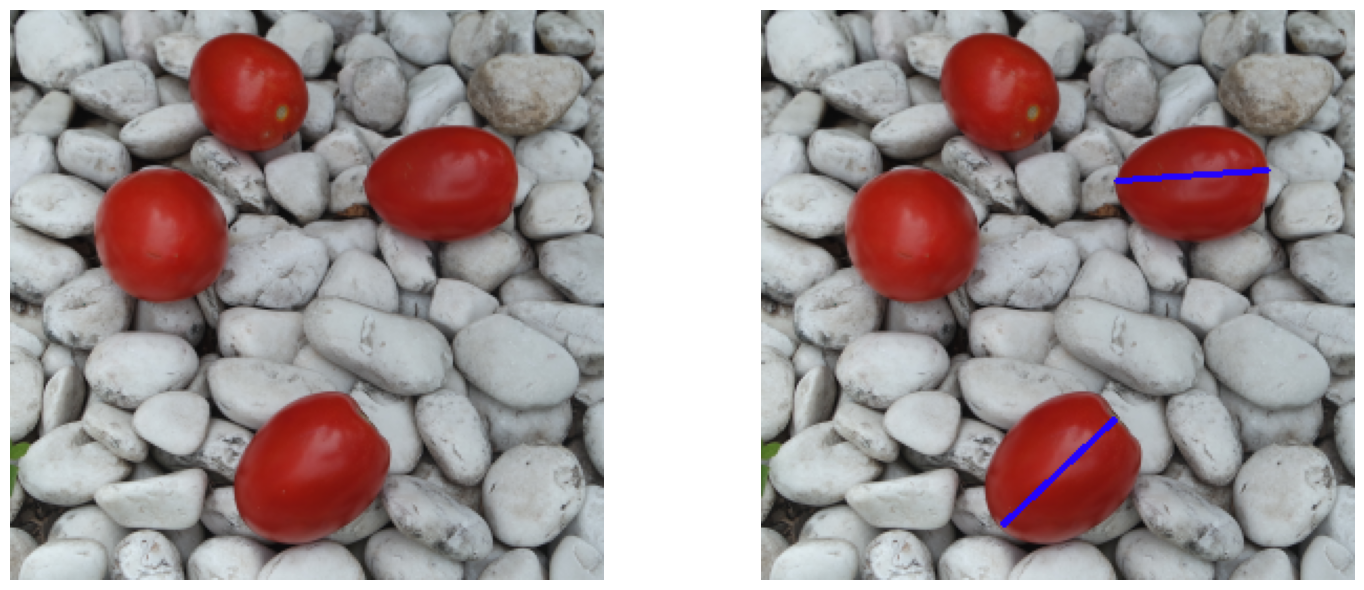

In [59]:
final = resized.copy()
#Linea 1
# cv2.line(final,(min_x,min_y),(max_x,max_y),(255,255,255),2)
cv2.line(final,(punto_inicial[0],punto_inicial[1]),(punto_final[0],punto_final[1]),(37, 3, 252),2)
 

cv2.line(final,(min_x,min_y),(max_x,max_y),(37, 3, 252),2)
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16, 6), sharex=True, sharey=True)
ax1 = axes.ravel()

ax1[0].imshow(resized, cmap=plt.cm.gray)
ax1[1].imshow(final, cmap=plt.cm.gray)
for a in ax1:
    a.set_axis_off()

fig.tight_layout()
plt.show()